# Импорты

In [20]:
import pandas as pd
import numpy as np

from statsmodels.distributions.empirical_distribution import ECDF

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Случайные величины. Нормальный закон распределения.

Случайные величины бывают:
- дискретные
- непрерывные

Смоделируем броски игральной кости.

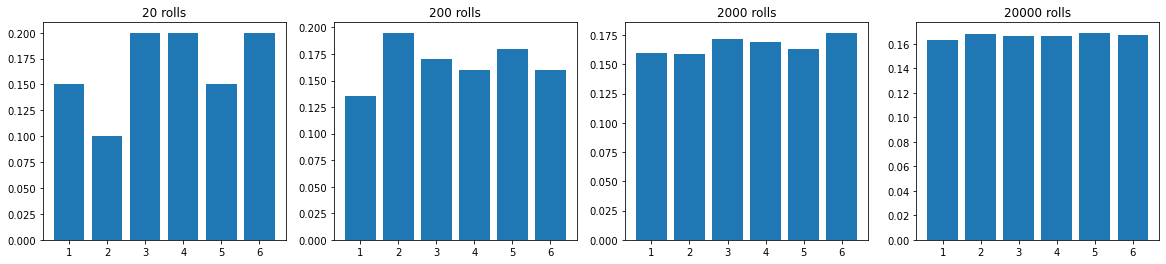

In [19]:
# количество бросков игральной кости
rolls = [20, 200, 2000, 20000]
sides = np.arange(1, 7)

# моделируем броски
fig, ax = plt.subplots(ncols=len(rolls), nrows=1, figsize=(20, 4))
for i, roll in enumerate(rolls):
    sample = np.random.choice(sides, size=roll)
    _, outcomes = np.unique(sample, return_counts=True)
    outcomes = outcomes / roll

    ax[i].bar(x=sides, height=outcomes)
    ax[i].set_title(f'{roll} rolls')
fig.show();

Мы видим, что с ростом количества бросков кубика, их выборочные вероятности стремятся к теоретическим вероятностя ($ \frac{1}{6} = 0.16667 $)

# Функция распределения.

Функция распределения:

$$ F(x) = P(X <= x) $$

Вероятность того, что СВ окажется в заданом интервале:

$$ P(a < X <= b) = F(b) - F(a) $$



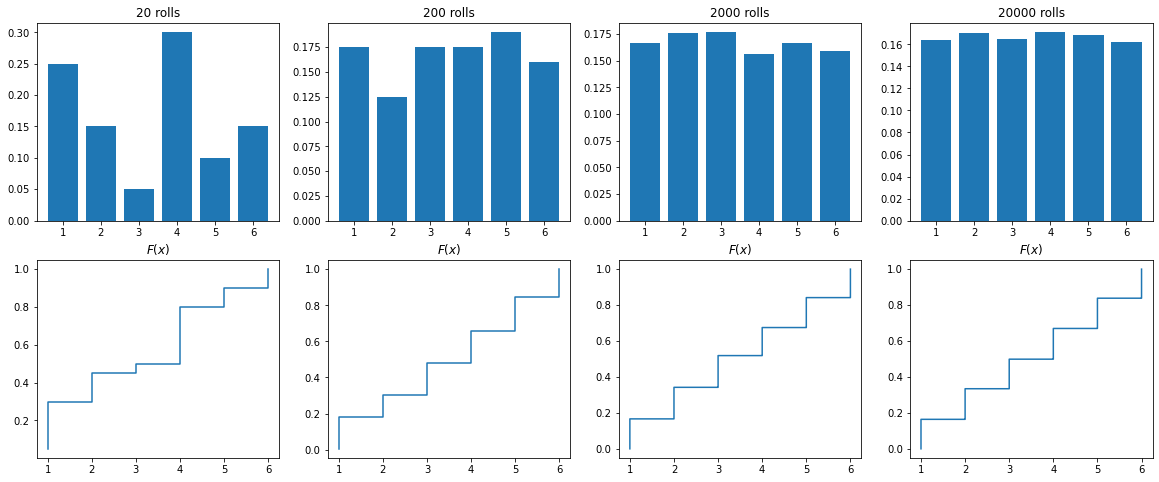

In [22]:
# построим функцию распределения для значений бросков игральной кости (для наших выборок)
fig, ax = plt.subplots(ncols=len(rolls), nrows=2, figsize=(20, 8))
for i, roll in enumerate(rolls):
    sample = np.random.choice(sides, size=roll)
    _, outcomes = np.unique(sample, return_counts=True)
    outcomes = outcomes / roll

    ax[0, i].bar(x=sides, height=outcomes)
    ax[0, i].set_title(f'{roll} rolls')

    F = ECDF(sample, side='right')
    ax[1, i].step(F.x, F.y)
    ax[1, i].set_title('$ F(x) $')
fig.show();